In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

Exploratory Data Analysis (EDA):

In [ ]:
file_path = "heart_disease.xlsx"
df = pd.read_excel(file_path, sheet_name='Heart_disease')

In [ ]:
df.shape

(908, 13)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,907.000000,845.000000,907.000000
mean,53.787211,133.412348,201.465270,135.976847,0.892308,1.007718
std,9.162016,20.405432,112.158285,26.813075,1.094092,1.144594
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.500000,120.000000,176.500000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
print(df['num'].value_counts())

num
0    399
1    265
2    108
3    107
4     28
Name: count, dtype: int64


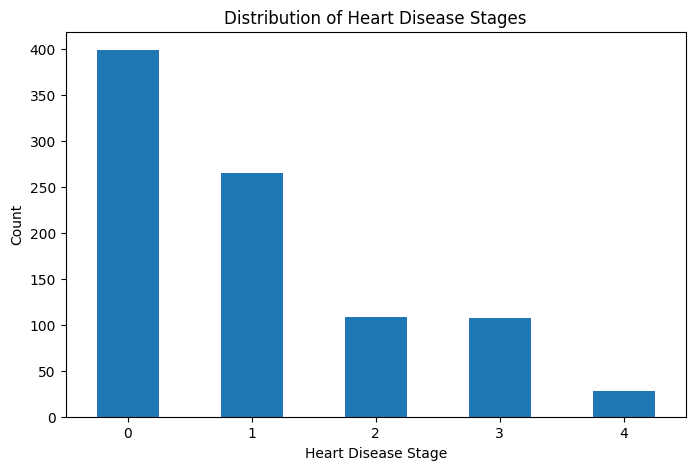

In [ ]:
# Visualize target distribution
plt.figure(figsize=(8, 5))
df['num'].value_counts().plot(kind='bar')
plt.title('Distribution of Heart Disease Stages')
plt.xlabel('Heart Disease Stage')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

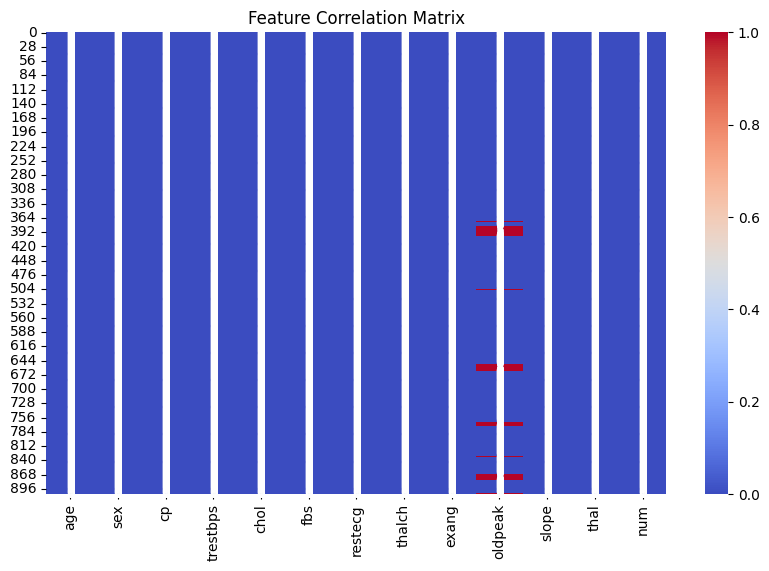

In [ ]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

<Axes: >

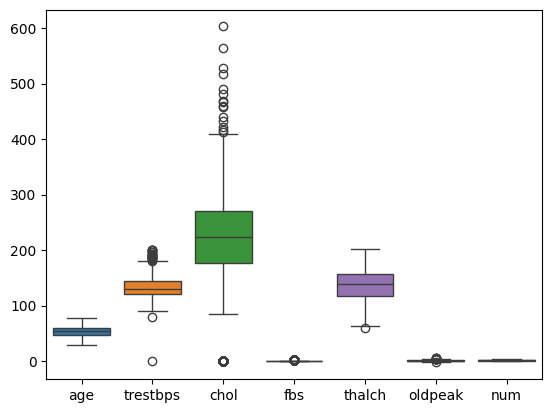

In [ ]:
sns.boxplot(df)

In [ ]:
# Outlier Capping
def outlier_capping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_extream=q1-1.5*iqr
    upper_extream=q3+1.5*iqr
    df[column]=df[column].apply(lambda x : lower_extream if x<lower_extream else upper_extream if x>upper_extream else x)
for col in df.select_dtypes(["int","float"]).columns:
    outlier_capping(df,col)

<Axes: >

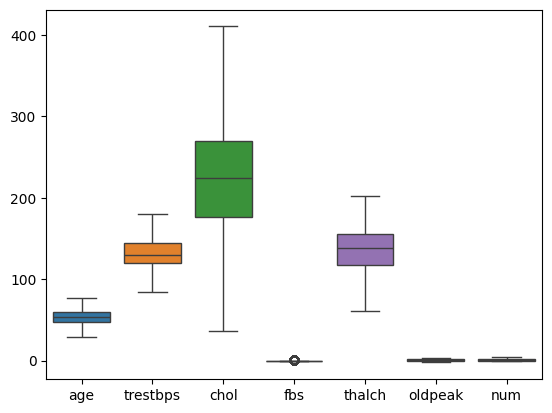

In [ ]:
sns.boxplot(df)

3. Feature Engineering:


In [ ]:
# Handle missing values in oldpeak
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

# Convert categorical variables to numerical
label_encoders = {}
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']

for col in categorical_cols:
    if col == 'thal':
        thal_categories = ['reversable defect', 'normal', 'fixed defect']
        df['thal'] = df['thal'].apply(lambda x: np.random.choice(thal_categories)
                                      if 'CHOOSE' in str(x) else x)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Fix boolean columns
df['exang'] = df['exang'].replace({'FALSE': False, 'TURE': True})
df[['fbs', 'exang']] = df[['fbs', 'exang']].astype(int)

# Final missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Create features and target AFTER encoding
features = df.drop("num", axis=1)
target = df["num"]

# NOW split (correct order)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check if any string columns remain
print("Object columns:", x_train.select_dtypes(include='object').columns)


Object columns: Index([], dtype='object')


In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,float64
chol,float64
fbs,int64
restecg,int64
thalch,float64
exang,int64
oldpeak,float64


4. Decision Tree Classification

In [ ]:
# Initialize and train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = dt_classifier.predict(x_test)

In [ ]:
# Evaluate the model
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Decision Tree Performance:
Accuracy: 0.5275
Precision: 0.5347
Recall: 0.5275
F1-Score: 0.5295


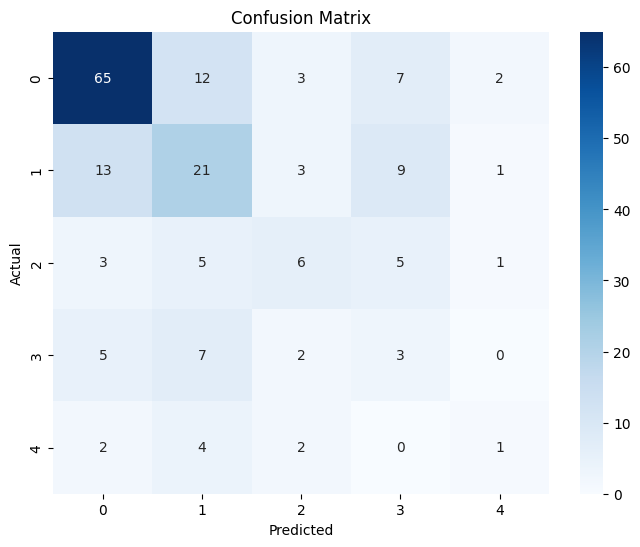

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73        89
           1       0.43      0.45      0.44        47
           2       0.38      0.30      0.33        20
           3       0.12      0.18      0.15        17
           4       0.20      0.11      0.14         9

    accuracy                           0.53       182
   macro avg       0.37      0.35      0.36       182
weighted avg       0.53      0.53      0.53       182



5. Hyperparameter Tuning

In [ ]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [ ]:
# Perform Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='accuracy')

In [ ]:
# Best parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.5406896551724139


In [ ]:
# Train with best parameters
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(x_test)

In [ ]:
print("\nOptimized Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best, average='weighted'):.4f}")


Optimized Decision Tree Performance:
Accuracy: 0.5879
Precision: 0.4838
Recall: 0.5879
F1-Score: 0.5294


6. Model Evaluation and Analysis

In [ ]:
# Feature importance
feature_importance = best_dt.feature_importances_
feature_names = X.columns

In [ ]:
# Create feature importance dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

In [ ]:
importance_df

,Feature,Importance
2,cp,0.549423
4,chol,0.216141
0,age,0.127807
8,exang,0.080586
7,thalch,0.026043
1,sex,0.000000
3,trestbps,0.000000
5,fbs,0.000000
6,restecg,0.000000
9,oldpeak,0.000000


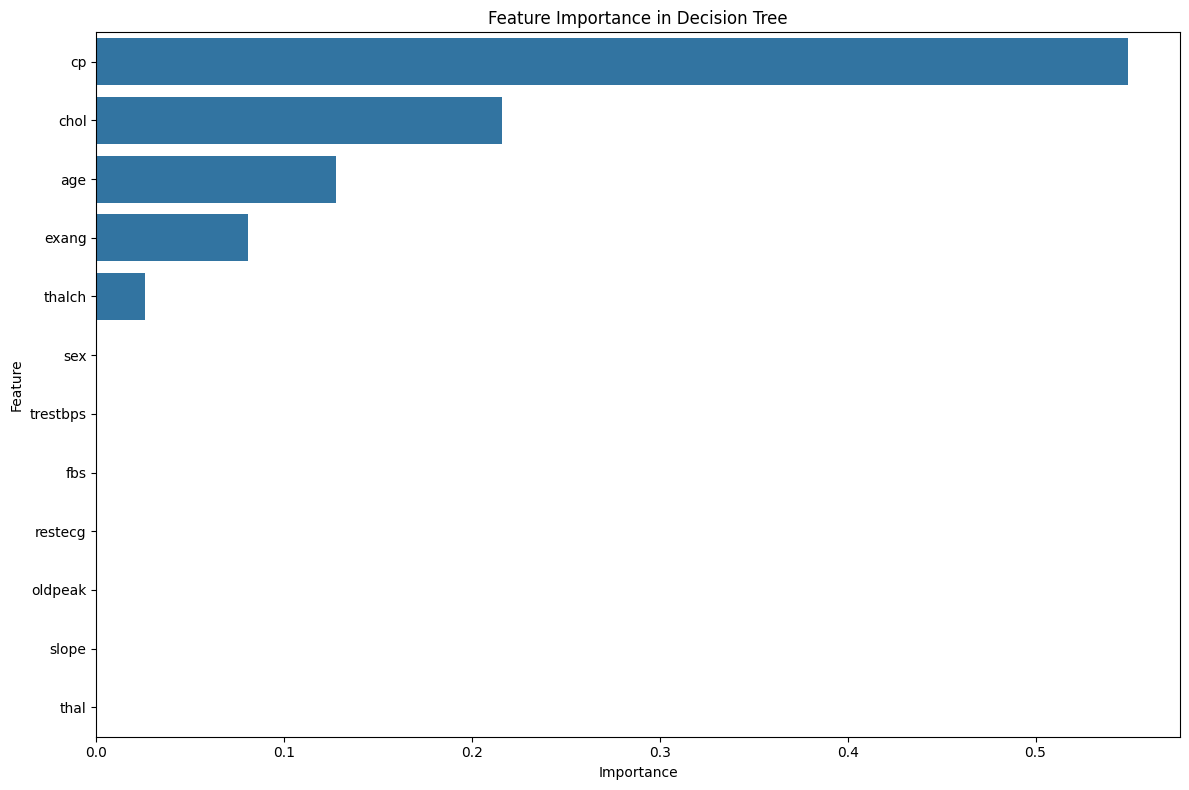

In [ ]:
# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Decision Tree')
plt.tight_layout()
plt.show()

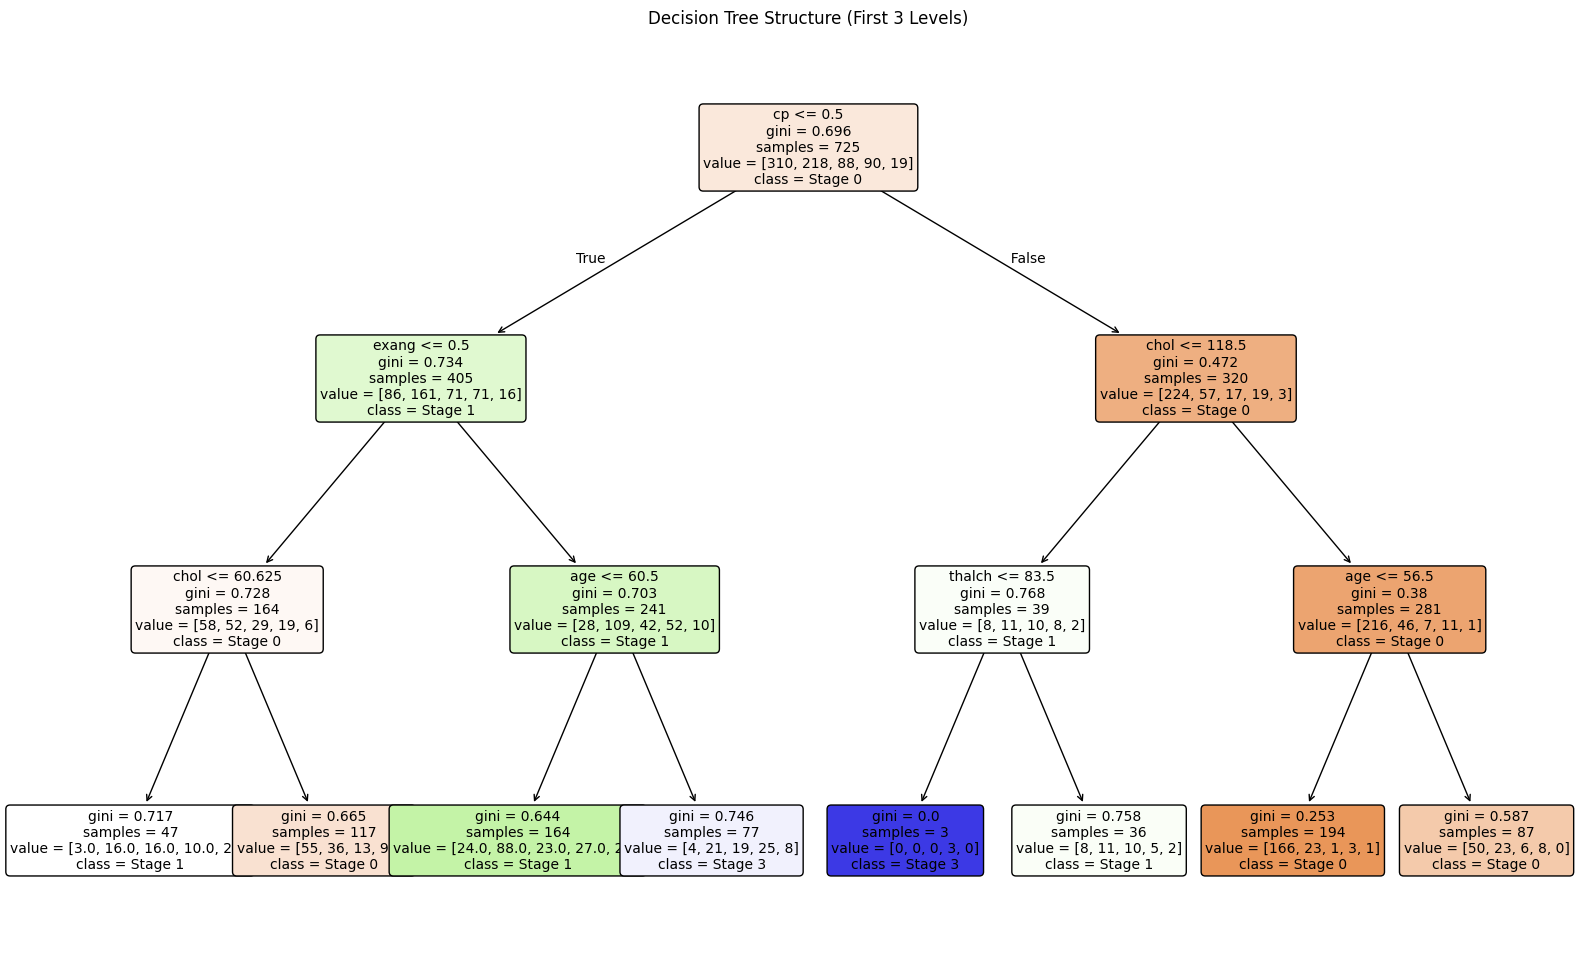

In [ ]:
# Visualize the decision tree (pruned for readability)
plt.figure(figsize=(20, 12))
plot_tree(best_dt,
          feature_names=feature_names,
          class_names=[f'Stage {i}' for i in range(5)],
          filled=True,
          rounded=True,
          max_depth=3,  # Limit depth for readability
          fontsize=10)
plt.title('Decision Tree Structure (First 3 Levels)')
plt.show()


Interview Questions:

What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

max_depth – limits how deep the tree can grow; prevents overfitting.

min_samples_split – minimum samples needed to split; higher values reduce overfitting.

min_samples_leaf – minimum samples in a leaf; larger leaves make the model simpler.

criterion – decides how splits are measured (gini/entropy).

max_features – number of features to consider for splitting; reduces variance.

max_leaf_nodes – limits number of leaves; avoids overfitting.

Difference between Label Encoding and One-Hot Encoding

Label Encoding

Converts categories into numbers like 0, 1, 2, 3…

Useful when categories have order (e.g., small < medium < large).

Problem: Model may think bigger number means “higher value”.

One-Hot Encoding

Creates separate columns for each category (0/1).

No order is assumed.

Best for non-ordered categories (e.g., colors, cities).